In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

#시간 순으로 3일 뒤에 있는 자료 y18은 다른 값 없이 데이터 밖에 없다.
#y18을 따로두어서 자료를 자르면 좋을거 같다.

In [40]:
temp = ['X00', 'X07', 'X28', 'X31', 'X32'] #온도
pressure = ['X01', 'X06', 'X22', 'X27', 'X29'] #기압
wind_velocity = ['X02', 'X03', 'X18', 'X24', 'X26'] #풍속
rainfall = ['X04', 'X10', 'X21', 'X36', 'X39'] #일일 누적강수량
sea_pressure = ['X05', 'X08', 'X09', 'X23', 'X33'] #해면기압
insolation = ['X11', 'X14', 'X16', 'X19', 'X34'] #일일 누적일사량
humidity = ['X12', 'X20', 'X30', 'X37', 'X38'] #습도
wind_direction = ['X13', 'X15', 'X17', 'X25', 'X35'] #풍향

sensor_temp = train.iloc[:,40:57] #센서 데이터 부분 
target_variable = train['Y18'] #3일 넘은 데이터는 train['Y18'] 예측 대상

sensor_temp = sensor_temp.dropna() #3일 안 데이터 외에 없는 데이터 삭제
target_variable = target_variable.dropna() #3일 동안의 데이터 삭제


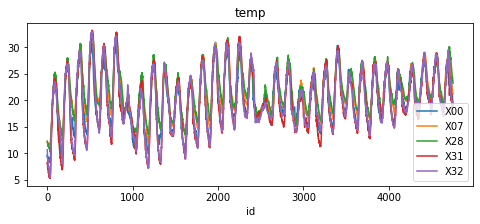

In [41]:
#실 온도이다. 여러가지로 전체적으로 같은 대전지역이라서 대단하다고 생각한다.
train.plot(x = 'id', y = temp, figsize=(8,3), title='temp')

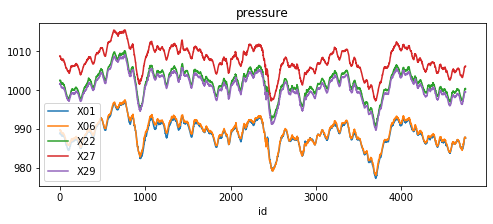

In [42]:
#기압이다. 전체적으로 지역에 비례해서 비슷한 균등한 반응을 보이니 전체적으로 고른 표준분포가 나올듯
train.plot(x = 'id', y = pressure, figsize=(8,3), title='pressure')

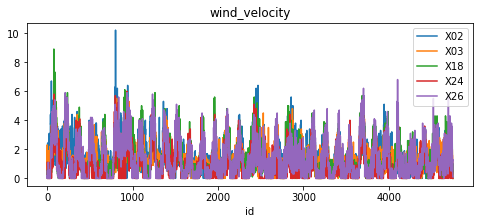

In [43]:
# 풍속인데 일정하나 유독 더 심하게 나오는 경우도 있다. 풍속은 과학의 원리사 온도와 반비례 하므로. 필요하다.
train.plot(x = 'id', y = wind_velocity, figsize=(8,3), title='wind_velocity')

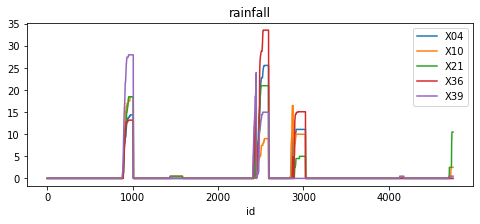

In [44]:
# 누적 강수량이다. 강수량도 직감적으로는 반비례한 영향이 있을 것이다.
# 비가 온 날짜도 일정하고 크게 문제가 없어보인다. 조금씩 쌓인 값이 있는데. 오차범위에 넣을지도 의문이다.
train.plot(x = 'id', y = rainfall, figsize=(8,3), title='rainfall')

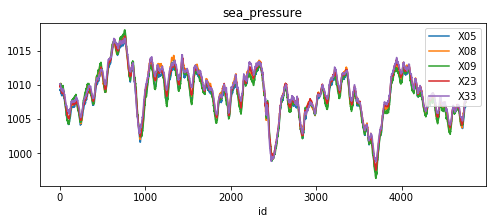

In [45]:
#대전의 자료라고 나와있는데 이 정도의 일사량이면 평균으로 재 보았을때 가을 쯤이란 것을 유추할 수 있다.
#센서를 조사해보면 대충 5% 정도의 오차가 각자 발생한다고 한다.  
train.plot(x = 'id', y = sea_pressure, figsize=(8,3), title='sea_pressure')

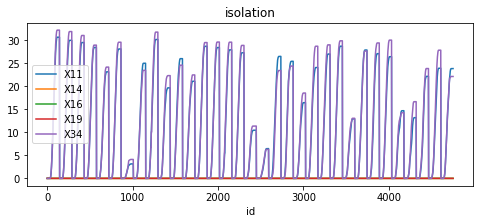

In [46]:
#일조량 센서 일부가 고장난듯 하다. 2개의 센서만 움직임이 있고 나머지 움직임이 없다.
#시간에 따라서 센서의 값을 제외 시키거나 값의 변화가 일정 값이 상 안 되었을 경우 한다.
#고장난게 아니라 실내라는 가정을 한다면 가능성이 있다. (하지만 기상청이 바보가 아니라면 실외에 설치했을 것이다.)
#일조량은 상관되는 관계가 있을 것이다.
train.plot(x = 'id', y = insolation, figsize=(8,3), title='isolation')

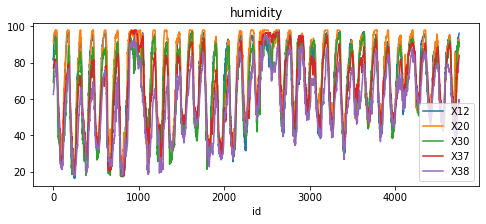

In [47]:
#습도 중에서 상대 습도에 대해서 이야기 하는거 같다. 
train.plot(x = 'id', y = humidity, figsize=(8,3), title='humidity')

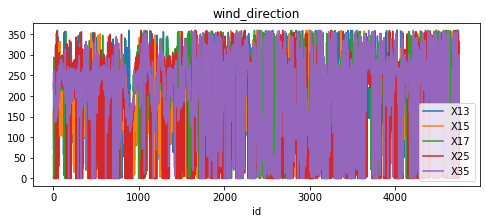

In [48]:
#데이터를 보았을때 바람의 방향을 북 기준으로 0도에서 360도까지 표현한듯 하다. 정확하게 360은 그러니 없을 것이다.
#풍향이 어떠한 영향이 있을지 나는 의문이다.
train.plot(x = 'id', y = wind_direction, figsize=(8,3), title='wind_direction')